In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [4]:
rng = np.random.default_rng(1904)

In [2]:
def match_formation(party_size, arrivals, match_size=5):
    arrival_time = np.cumsum(arrivals)
    n = len(party_size)

    queues = {s: [] for s in range(1, match_size)}

    filled_lobbies = []    
    open_lobbies = None
    party_wait = np.full(n, np.nan)
    lobby_waits = []
    individual_wait = []

    for i, size in enumerate(party_size):
        size = int(size)
        t = arrival_time[i]

        if size == match_size:
            filled_lobbies.append([match_size])
            party_wait[i] = 0.0
            lobby_waits.append(0.0)
            individual_wait.extend([0.0] * match_size)
            continue

        pair = match_size - size

        if queues[pair]:
            j = queues[pair].pop(0)   # FIFO
            fill_time = t
            start_time = arrival_time[j]

            lobby = [party_size[j], size]
            filled_lobbies.append(lobby)

            w_j = fill_time - arrival_time[j]
            w_i = 0.0

            party_wait[j] = w_j
            party_wait[i] = w_i

            lobby_waits.append(fill_time - start_time)

            individual_wait.extend([w_j] * int(party_size[j]))
            individual_wait.extend([w_i] * int(size))

        else:
            queues[size].append(i)

    open_lobbies = [[party_size[i] for i in queues[s]] for s in queues if queues[s]]

    return {
        "filled_lobbies": filled_lobbies,
        "open_lobbies": open_lobbies,
        "party_wait": party_wait,
        "lobby_waits": np.array(lobby_waits),
        "individual_wait": np.array(individual_wait),
    }

In [5]:
N = 1000
sizes = np.random.randint(1, 6, size=N)
arrivals = rng.uniform(0, 5, size=N)

In [7]:
match_queue = match_formation(sizes, arrivals)
avg_wt = match_queue['lobby_waits']

count    562.000000
mean     175.334767
std      218.962080
min        0.000000
25%        0.000000
50%       96.214543
75%      250.753499
max      853.137299
dtype: float64

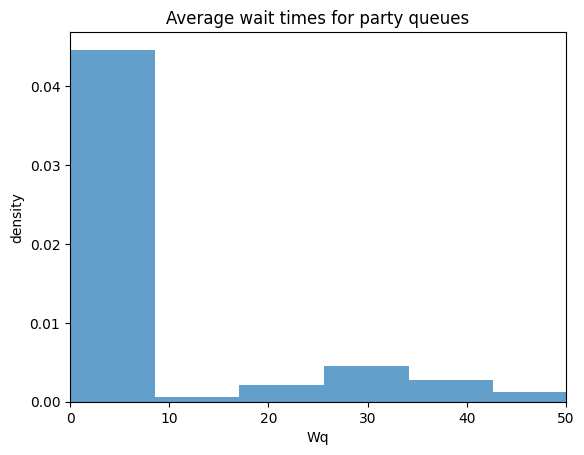

In [8]:
plt.figure()
plt.hist(avg_wt, bins=100, density=True, alpha=0.7)
plt.xlabel("Wq"); plt.ylabel("density"); plt.title("Average wait times for party queues")
plt.xlim(0, 50)

s = pd.Series(avg_wt)
s.describe()

In [13]:
N = 1000
means = []
medians = []

for i in range(100):
    arrivals = rng.uniform(0, 5, size=N)
    sizes = np.random.randint(1, 6, size=N)
    
    match = match_formation(sizes, arrivals)
    
    avg_wt = match["lobby_waits"]
    s = pd.Series(avg_wt)
    
    means.append(s.describe()[1])    # [1] is the mean
    medians.append(s.describe()[5])  # [5] is the median

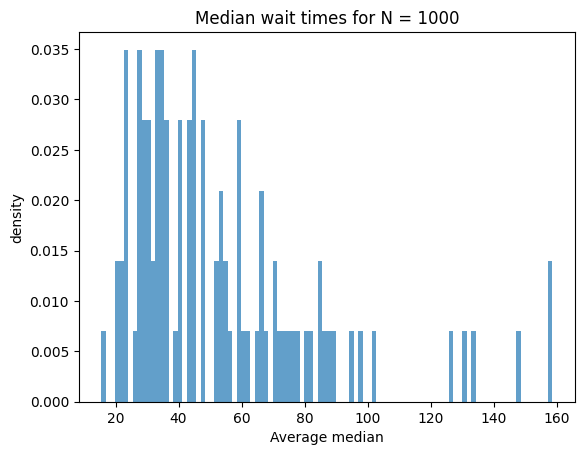

In [14]:
# median
plt.figure()
plt.hist(medians, bins=100, density=True, alpha=0.7)
plt.xlabel("Average median")
plt.ylabel("density")
plt.title("Median wait times for N = 1000")
plt.show()

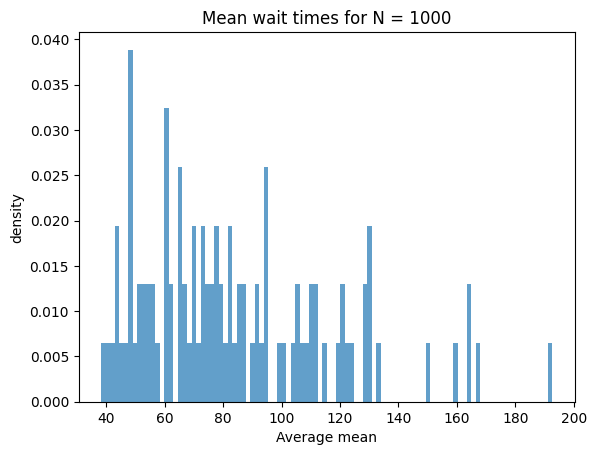

In [15]:
# mean
plt.figure()
plt.hist(means, bins=100, density=True, alpha=0.7)
plt.xlabel("Average mean")
plt.ylabel("density")
plt.title("Mean wait times for N = 1000")
plt.show()

In [12]:
def Poissondist(N, lmb):
    arr = rng.poisson(lmb, size=N)
    for i in range(N):
        if arr[i] == 0:
            arr[i] = 1
        if arr[i] > 5:
            arr[i] = rng.choice([1,2,3,4,5])
    return arr

Text(0.5, 1.0, 'Individual Wait in Queue: (Poisson Party Size)')

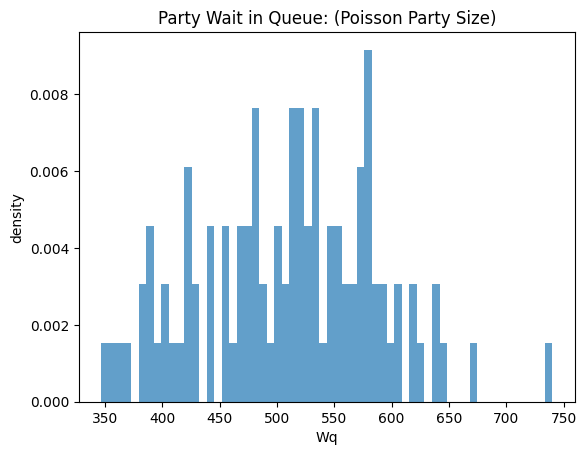

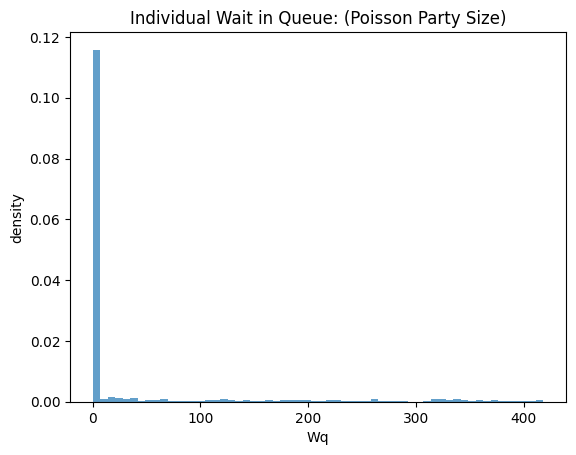

In [16]:
N = 1000
means = []
medians = []
individual_wt = []

for i in range(100):
    arrivals = rng.uniform(0, 5, size=N)
    sizes = Poissondist(N, 2)
    
    match = match_formation(sizes, arrivals)
    
    avg_wt = match['lobby_waits']
    s = pd.Series(avg_wt)
    means.append(s.describe()[1])    
    medians.append(s.describe()[5])

    individual_wt = fill['individual_wait']
plt.figure()
plt.hist(means, bins=60, density=True, alpha=0.7)
plt.xlabel("Wq"); plt.ylabel("density"); plt.title("Party Wait in Queue: (Poisson Party Size)")

plt.figure()
plt.hist(individual_wt, bins=60, density=True, alpha=0.7)
plt.xlabel("Wq"); plt.ylabel("density"); plt.title("Individual Wait in Queue: (Poisson Party Size)")